#**RENTAL HOUSE PRICING PREDICTION**

**CENG3522 - Applied Machine Learning Final Project**

Instructor : Barış Ethem Süzek <br> Project Team Members : Bartu Paçal,
Begüm Başovalı, Vuslat Sülbiye Türk

# **INTRODUCTION**

**PROJECT THEME :** <br>We picked the theme of real estate price prediction. Specifically, we focused on predicting rental prices for apartments in Bursa, Turkey, using applied machine learning techniques. Our goal was to build a model that could estimate rental costs based on features such as location, number of rooms, size, floor level, and other relevant attributes. This theme is highly practical and relevant, especially in today’s dynamic housing market.

**MOTIVATION & GOAL :** <br>At the beginning of the project, we explored several different topics. However, most of the datasets we found were either insufficient or not detailed enough for effective analysis. Therefore, we decided to work with a rental house price dataset, as it contains rich and comprehensive features. Our goal is to develop a model that can accurately predict rental prices using the available property attributes. We are motivated by the need to help individuals accurately estimate rental prices in Bursa, where property values can vary significantly based on multiple factors. By creating a data-driven tool that predicts the rental cost of an apartment given its features, we aim to assist both tenants and landlords in making informed decisions.

**MACHINE LEARNING PROBLEM:** <br>This is a regression problem because the goal is to predict a continuous numerical value — the price of a house — based on the input features. Machine learning models learn the relationship between property characteristics and sale prices to make future predictions.

# **METHODOLOGY**

**COLLECTING DATASET :** <br>In this project, we built our own custom dataset by scraping rental apartment listings from three major real estate websites: Remax, HepsiEmlak, and Emlakjet. To gather the data, we used a combination of web scraping techniques. For some sites, we used the requests library along with BeautifulSoup to parse the HTML content and extract relevant features. For others that required interaction with dynamic content, we used Selenium to automate browser actions. To mimic human behavior and avoid getting blocked, we included randomized delays and custom headers to emulate a real browser.

The dataset includes various attributes such as Listing URL, Price, Gross Area (m²), Net Area (m²), Floor Number, Number of Bathrooms, Building Age, Deposit, Furnished, Total Floors, Occupancy Status, Inside Residential Complex, Deed Status, Building Condition, Property Type, City, District, Neighborhood, Fuel Type, Heating Type, Number of Rooms, Number of Living Rooms. After data collection, we cleaned and combined the data into a single structured dataset suitable for machine learning.

**What experimets you conducted ?** <br>
1.  *Data Preprocessing:*
    *   Loading data from an Excel file.
    *   Handling missing values by filling numeric columns with their mean.
    *   Converting specific columns to integer type.
    *   Applying One-Hot Encoding to categorical features like 'İlçe' and 'Isıtma Türü'.
    *   Initial data inspection (.head(), .isnull().sum(), .info()).

2.  *Exploratory Data Analysis (EDA):*
    *   Visualizing the distribution of rent prices using histograms and boxplots (using Plotly Express).
    *   Analyzing the distribution of 'kat\_sayisi\_clean' (floor number) and 'banyo\_sayisi\_clean' (bathroom count) using Seaborn countplots and Matplotlib/Plotly pie charts.
    *   Examining the relationship between 'oda\_clean' (room count) and 'price\_clean' using a boxenplot.
    *   Visualizing pairwise relationships between integer columns using Seaborn pairplots.
    *   Analyzing correlations between numeric features using a Seaborn heatmap.
    *   Determining feature importance for the Random Forest model.

3.  *Model Training and Evaluation:*
    *   Splitting the data into features (X) and target (y), then into training and testing sets (70/30 split).
    *   Scaling features and the target variable using StandardScaler.
    *   Training and evaluating four different regression models:
        *   Linear Regression (LinearRegression)
        *   Decision Tree Regressor (DecisionTreeRegressor)
        *   Support Vector Regressor (SVR)
        *   Random Forest Regressor (RandomForestRegressor)
        *   Lasso Regression (Lasso)
    *   Evaluating model performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) on the test set.

4.  *Price Guessing (Individual Predictions):*
    *   Using the trained models (Linear Regression, Random Forest, SVR, Decision Tree) to predict the price for a single, specific data instance from the test set.
    *   Calculating and printing the predicted value, actual value, and the percentage error for that specific prediction.

5.  *Price Guessing with New Values:*
    *   Demonstrating how to use the trained models (Random Forest, SVR, Decision Tree, Linear Regression) to predict the price for a completely new set of house features (simulating a user input).
    *   This involves creating a DataFrame for the new input, scaling it using the previously fitted scaler, making a prediction, and inverse transforming the prediction back to the original currency unit.
    *   Also recalculates and prints the test set performance metrics (MAE, MSE, RMSE as percentages) for the models when trained on an 80/20 split.

# **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **DATA PREPROCESSING**

In [4]:
# Load the dataset from an Excel file
dataset = pd.read_excel('/content/ml_data_eksiltilmiş.xlsx')

# Display the first 5 rows of the dataset
print(dataset.head())

   price_clean  bina_yasi_clean  oda_clean  m2_brut_clean  m2_net_clean  \
0      25000.0             12.5        2.5          105.0          90.0   
1      14000.0             28.5        2.0           90.0          74.0   
2      30000.0             12.5        5.0          280.0         220.0   
3      21000.0             22.5        2.0            NaN           NaN   
4      20000.0              1.0        2.0          118.0          91.0   

   bulundugu_kat_clean  banyo_sayisi_clean  kat_sayisi_clean  salon_clean  \
0                  1.0                 1.0                 5            1   
1                  1.0                 1.0                 3            1   
2                  5.0                 4.0                 5            1   
3                  0.0                 1.0                 4            1   
4                  3.0                 2.0                10            1   

   esyali_clean  site_icinde_clean  yapinin_durumu_encoded  \
0             0         

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset.isnull().sum()

,0
price_clean,3
bina_yasi_clean,0
oda_clean,0
m2_brut_clean,1
m2_net_clean,1
bulundugu_kat_clean,15
banyo_sayisi_clean,6
kat_sayisi_clean,0
salon_clean,0
esyali_clean,0


In [7]:
# Filling missing values with mean for numeric columns
numeric_cols = dataset.select_dtypes(include=np.number).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Convert specific columns to integer after filling NaNs
dataset["price_clean"] = dataset["price_clean"].round().astype('int')
dataset["bulundugu_kat_clean"] = dataset["bulundugu_kat_clean"].round().astype('int')
dataset["banyo_sayisi_clean"] = dataset["banyo_sayisi_clean"].round().astype('int')

dataset = pd.get_dummies(dataset, columns=['İlçe', 'Isıtma Türü'])
dataset.head()

,price_clean,bina_yasi_clean,oda_clean,m2_brut_clean,m2_net_clean,bulundugu_kat_clean,banyo_sayisi_clean,kat_sayisi_clean,salon_clean,esyali_clean,...,Isıtma Türü_Isı Pompası,Isıtma Türü_Isıtma Yok,Isıtma Türü_Kat Kaloriferi,Isıtma Türü_Klima,Isıtma Türü_Kombi,Isıtma Türü_Merkezi,Isıtma Türü_Merkezi,Isıtma Türü_Pay Ölçer,Isıtma Türü_Soba,Isıtma Türü_Yerden Isıtma
0,25000,12.5,2.5,105.000000,90.000000,1,1,5,1,0,...,False,False,False,False,True,False,False,False,False,False
1,14000,28.5,2.0,90.000000,74.000000,1,1,3,1,1,...,False,False,False,False,True,False,False,False,False,False
2,30000,12.5,5.0,280.000000,220.000000,5,4,5,1,0,...,False,False,False,False,True,False,False,False,False,False
3,21000,22.5,2.0,139.461376,98.407937,0,1,4,1,1,...,False,False,False,False,False,False,False,False,True,False
4,20000,1.0,2.0,118.000000,91.000000,3,2,10,1,0,...,False,False,False,False,True,False,False,False,False,False


In [8]:
dataset.isnull().sum()

,0
price_clean,0
bina_yasi_clean,0
oda_clean,0
m2_brut_clean,0
m2_net_clean,0
bulundugu_kat_clean,0
banyo_sayisi_clean,0
kat_sayisi_clean,0
salon_clean,0
esyali_clean,0


In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_clean                  1891 non-null   int64  
 1   bina_yasi_clean              1891 non-null   float64
 2   oda_clean                    1891 non-null   float64
 3   m2_brut_clean                1891 non-null   float64
 4   m2_net_clean                 1891 non-null   float64
 5   bulundugu_kat_clean          1891 non-null   int64  
 6   banyo_sayisi_clean           1891 non-null   int64  
 7   kat_sayisi_clean             1891 non-null   int64  
 8   salon_clean                  1891 non-null   int64  
 9   esyali_clean                 1891 non-null   int64  
 10  site_icinde_clean            1891 non-null   int64  
 11  yapinin_durumu_encoded       1891 non-null   int64  
 12  kullanim_durumu_encoded      1891 non-null   int64  
 13  İlçe_Gemlik       

In [10]:
# Create a histogram to show the distribution of rent prices
fig = px.histogram(
    dataset,
    x='price_clean',
    color_discrete_sequence=px.colors.qualitative.Set3,  # Use a qualitative color palette
    title="Rent Prices Distribution Histogram"
)
fig.show()

# Create a boxplot to visualize the spread and outliers in rent prices
fig = px.box(
    dataset,
    x="price_clean",
    title='Boxplot for Rent Prices'
)
fig.show()

In [11]:
# Using IQR to remove outliers from 'price_clean'
Q1 = dataset['price_clean'].quantile(0.25)
Q3 = dataset['price_clean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
dataset_no_outliers = dataset[(dataset['price_clean'] >= lower_bound) & (dataset['price_clean'] <= upper_bound)]

# Display the shape before and after removing outliers
print(f"Shape before removing outliers: {dataset.shape}")
print(f"Shape after removing outliers: {dataset_no_outliers.shape}")

# Optionally, visualize the price distribution after removing outliers
fig = px.box(
    dataset_no_outliers,
    x="price_clean",
    title='Boxplot for Rent Prices After Outlier Removal (IQR)'
)
fig.show()

fig = px.histogram(
    dataset_no_outliers,
    x='price_clean',
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="Rent Prices Distribution Histogram After Outlier Removal (IQR)"
)
fig.show()

# You can now use dataset_no_outliers for further analysis and modeling


Shape before removing outliers: (1891, 36)
Shape after removing outliers: (1826, 36)


In [70]:
dataset_no_outliers.head()

,price_clean,bina_yasi_clean,oda_clean,m2_brut_clean,m2_net_clean,bulundugu_kat_clean,banyo_sayisi_clean,kat_sayisi_clean,salon_clean,esyali_clean,...,Isıtma Türü_Isı Pompası,Isıtma Türü_Isıtma Yok,Isıtma Türü_Kat Kaloriferi,Isıtma Türü_Klima,Isıtma Türü_Kombi,Isıtma Türü_Merkezi,Isıtma Türü_Merkezi,Isıtma Türü_Pay Ölçer,Isıtma Türü_Soba,Isıtma Türü_Yerden Isıtma
0,25000,12.5,2.5,105.000000,90.000000,1,1,5,1,0,...,False,False,False,False,True,False,False,False,False,False
1,14000,28.5,2.0,90.000000,74.000000,1,1,3,1,1,...,False,False,False,False,True,False,False,False,False,False
2,30000,12.5,5.0,280.000000,220.000000,5,4,5,1,0,...,False,False,False,False,True,False,False,False,False,False
3,21000,22.5,2.0,139.461376,98.407937,0,1,4,1,1,...,False,False,False,False,False,False,False,False,True,False
4,20000,1.0,2.0,118.000000,91.000000,3,2,10,1,0,...,False,False,False,False,True,False,False,False,False,False


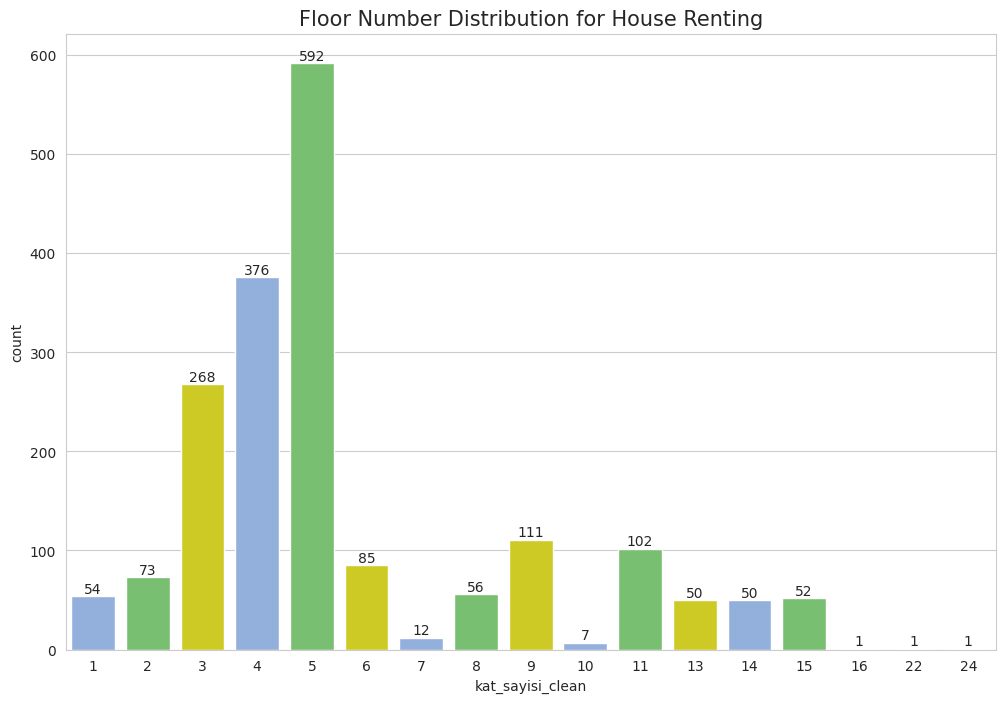

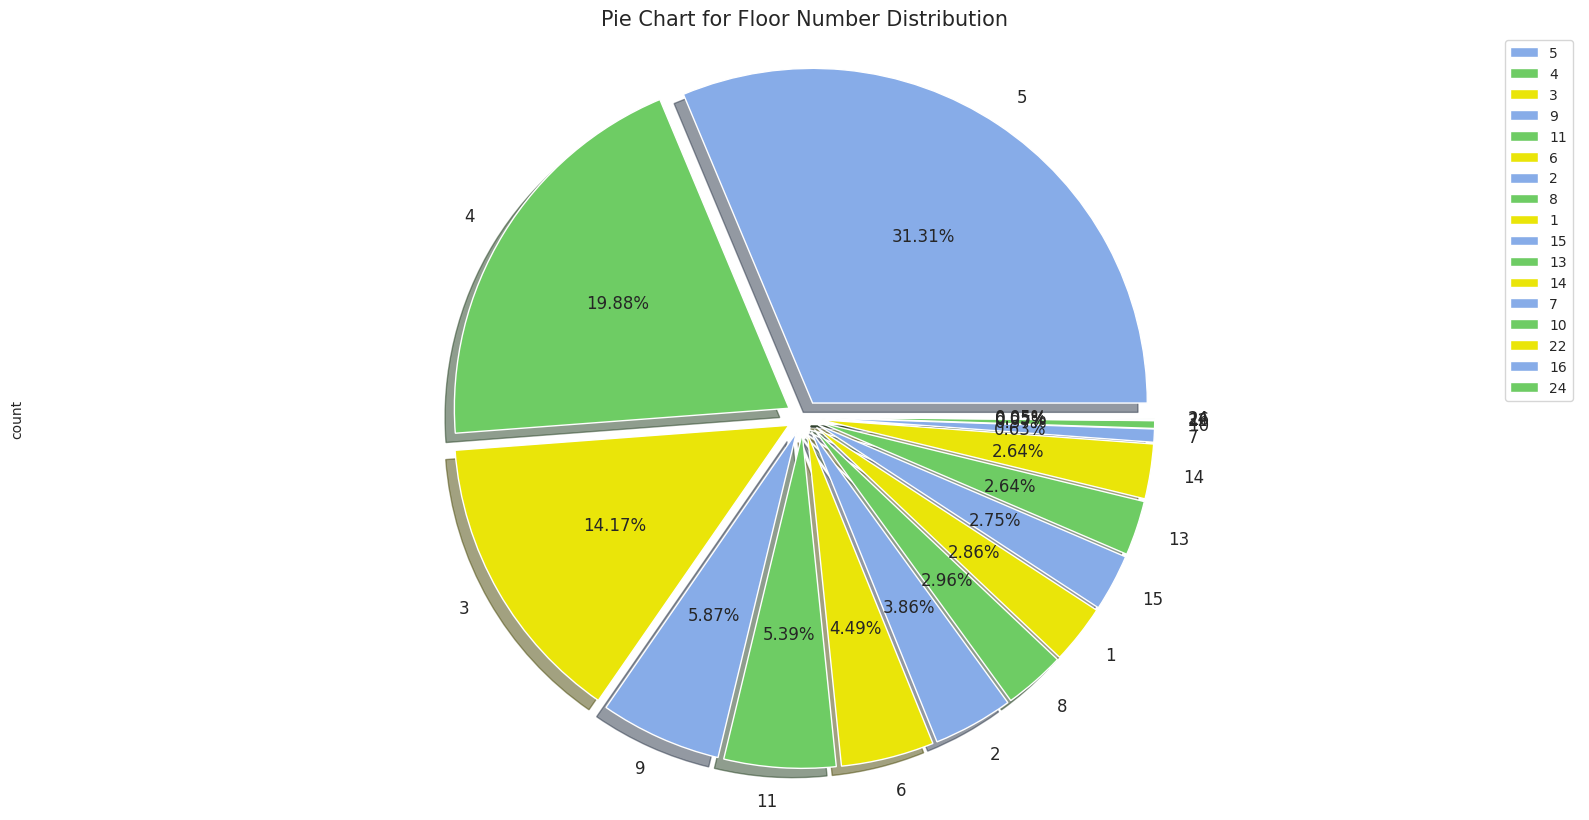

In [12]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')  # Set seaborn style for plots

# Create a figure and axes for the countplot
fig, axes = plt.subplots(figsize=(12, 8))

# Plot a countplot for the 'kat_sayisi_clean' column with custom colors
ax = sns.countplot(x='kat_sayisi_clean', data=dataset, palette=colors)

# Add labels to each bar showing the count values
for container in ax.containers:
    ax.bar_label(container)

# Add a title to the countplot
plt.title('Floor Number Distribution for House Renting', fontsize=15)
plt.show()

# Create a larger figure for the pie chart
plt.figure(figsize=(20, 10))

# Get the counts of each category in 'kat_sayisi_clean' to determine pie wedges
kat_sayisi_counts = dataset['kat_sayisi_clean'].value_counts()

# Create an explode list to slightly separate each pie slice for emphasis
explode_list = [0.05] * len(kat_sayisi_counts)

# Plot a pie chart of floor number distribution with percentage labels and shadows
kat_sayisi_counts.plot.pie(
    explode=explode_list,
    textprops={'fontsize': 12},
    autopct='%1.2f%%',
    colors=colors,
    shadow=True
)

# Add a title to the pie chart
plt.title('Pie Chart for Floor Number Distribution', fontsize=15)

# Ensure pie chart is drawn as a circle
plt.axis('equal')

# Add a legend in the best location automatically
plt.legend(loc="best")

# Show the pie chart
plt.show()

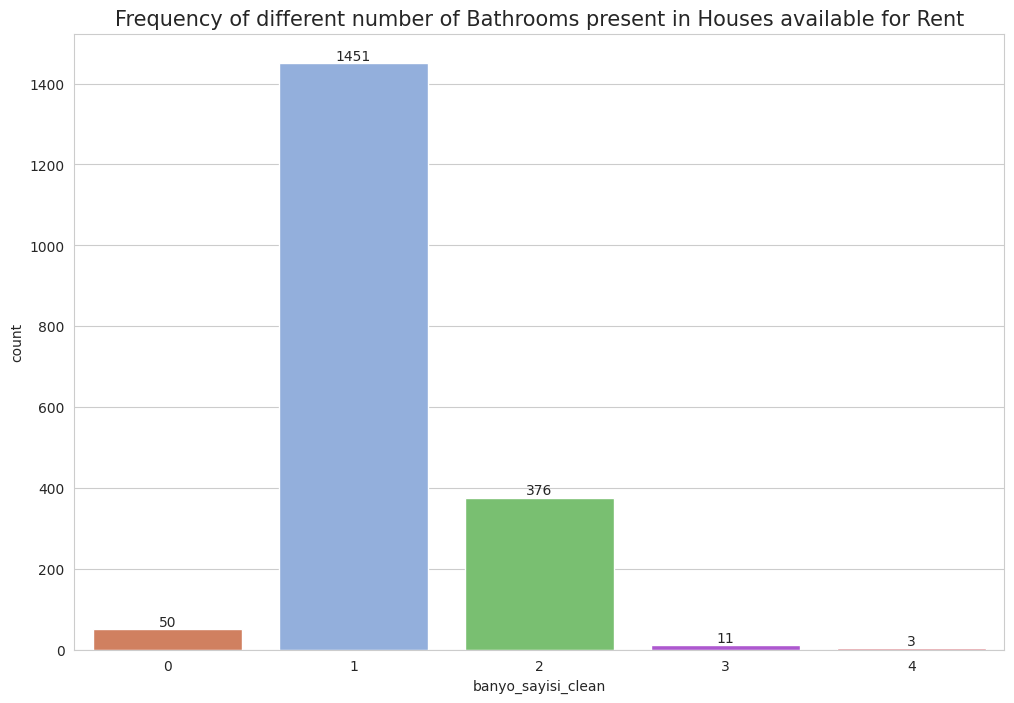

In [13]:
# Set the style of the seaborn plots to 'whitegrid' for better readability
sns.set_style('whitegrid')

# Create a figure and axes object with specified size
fig, axes = plt.subplots(figsize=(12,8))

# Define a custom color palette for the countplot bars
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

# Plot the count of each category in 'banyo_sayisi_clean' with the defined colors
ax = sns.countplot(x='banyo_sayisi_clean', data=dataset, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])

# Add bar labels to display the exact counts on each bar
for container in ax.containers:
    ax.bar_label(container)

# Set the title of the plot
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent', fontsize=15)

# Display the countplot
plt.show()

# Create a pie chart using plotly express to show the proportion of each bathroom count category
fig = px.pie(dataset,
             names='banyo_sayisi_clean',
             height=700, width=700,
             color_discrete_sequence=px.colors.sequential.deep,
             title='Pie Chart for different number of Bathrooms present in Houses available for Rent')

# Increase font size of the text labels in the pie chart for better readability
fig.update_traces(textfont_size=15)

# Display the pie chart
fig.show()

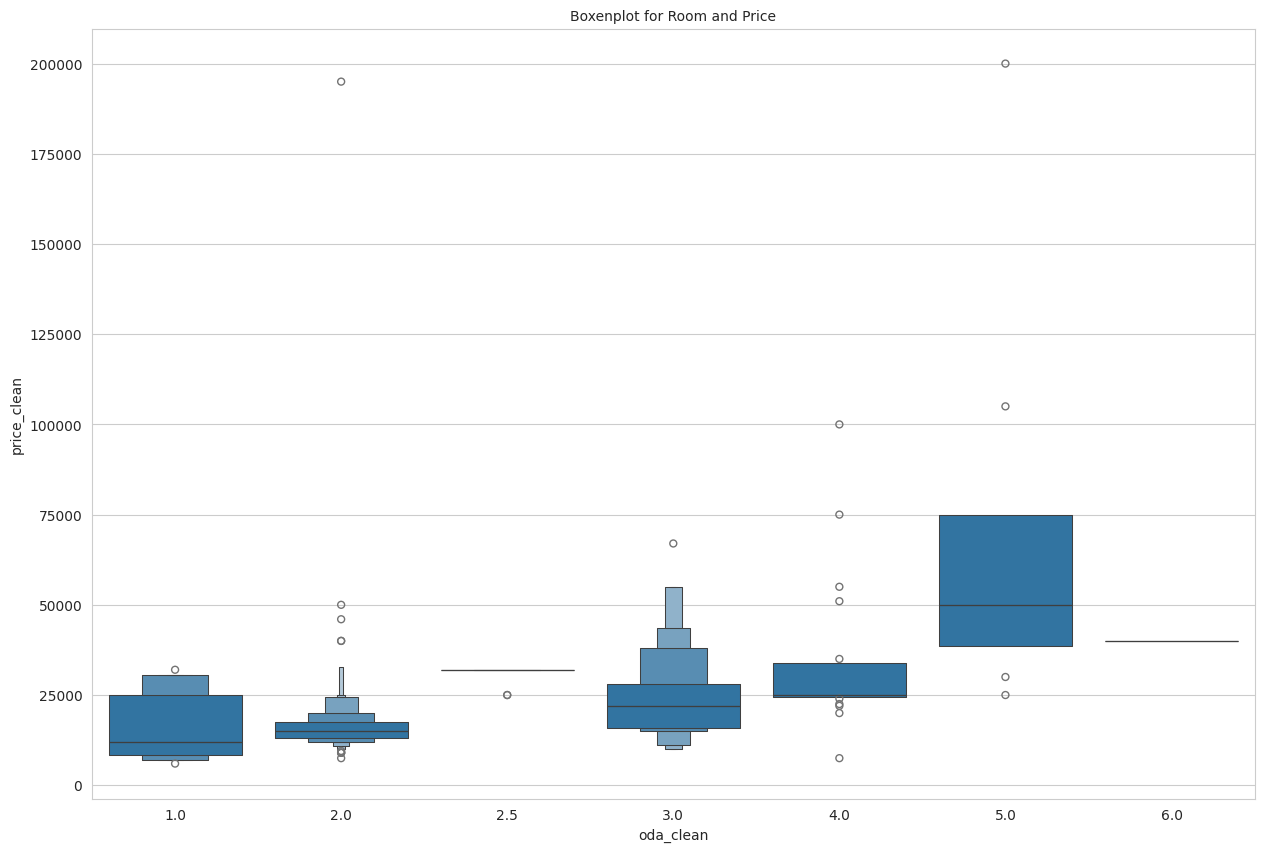

In [14]:
# Create a figure and axes object with specified size
fig, axes = plt.subplots(figsize=(15, 10))

# Draw a boxenplot to show the distribution of 'price_clean' for each category in 'oda_clean'
sns.boxenplot(x="oda_clean", y='price_clean', data=dataset)

# Add a title to the plot with specified font size
plt.title('Boxenplot for Room and Price', fontsize=10)

# Display the plot
plt.show()

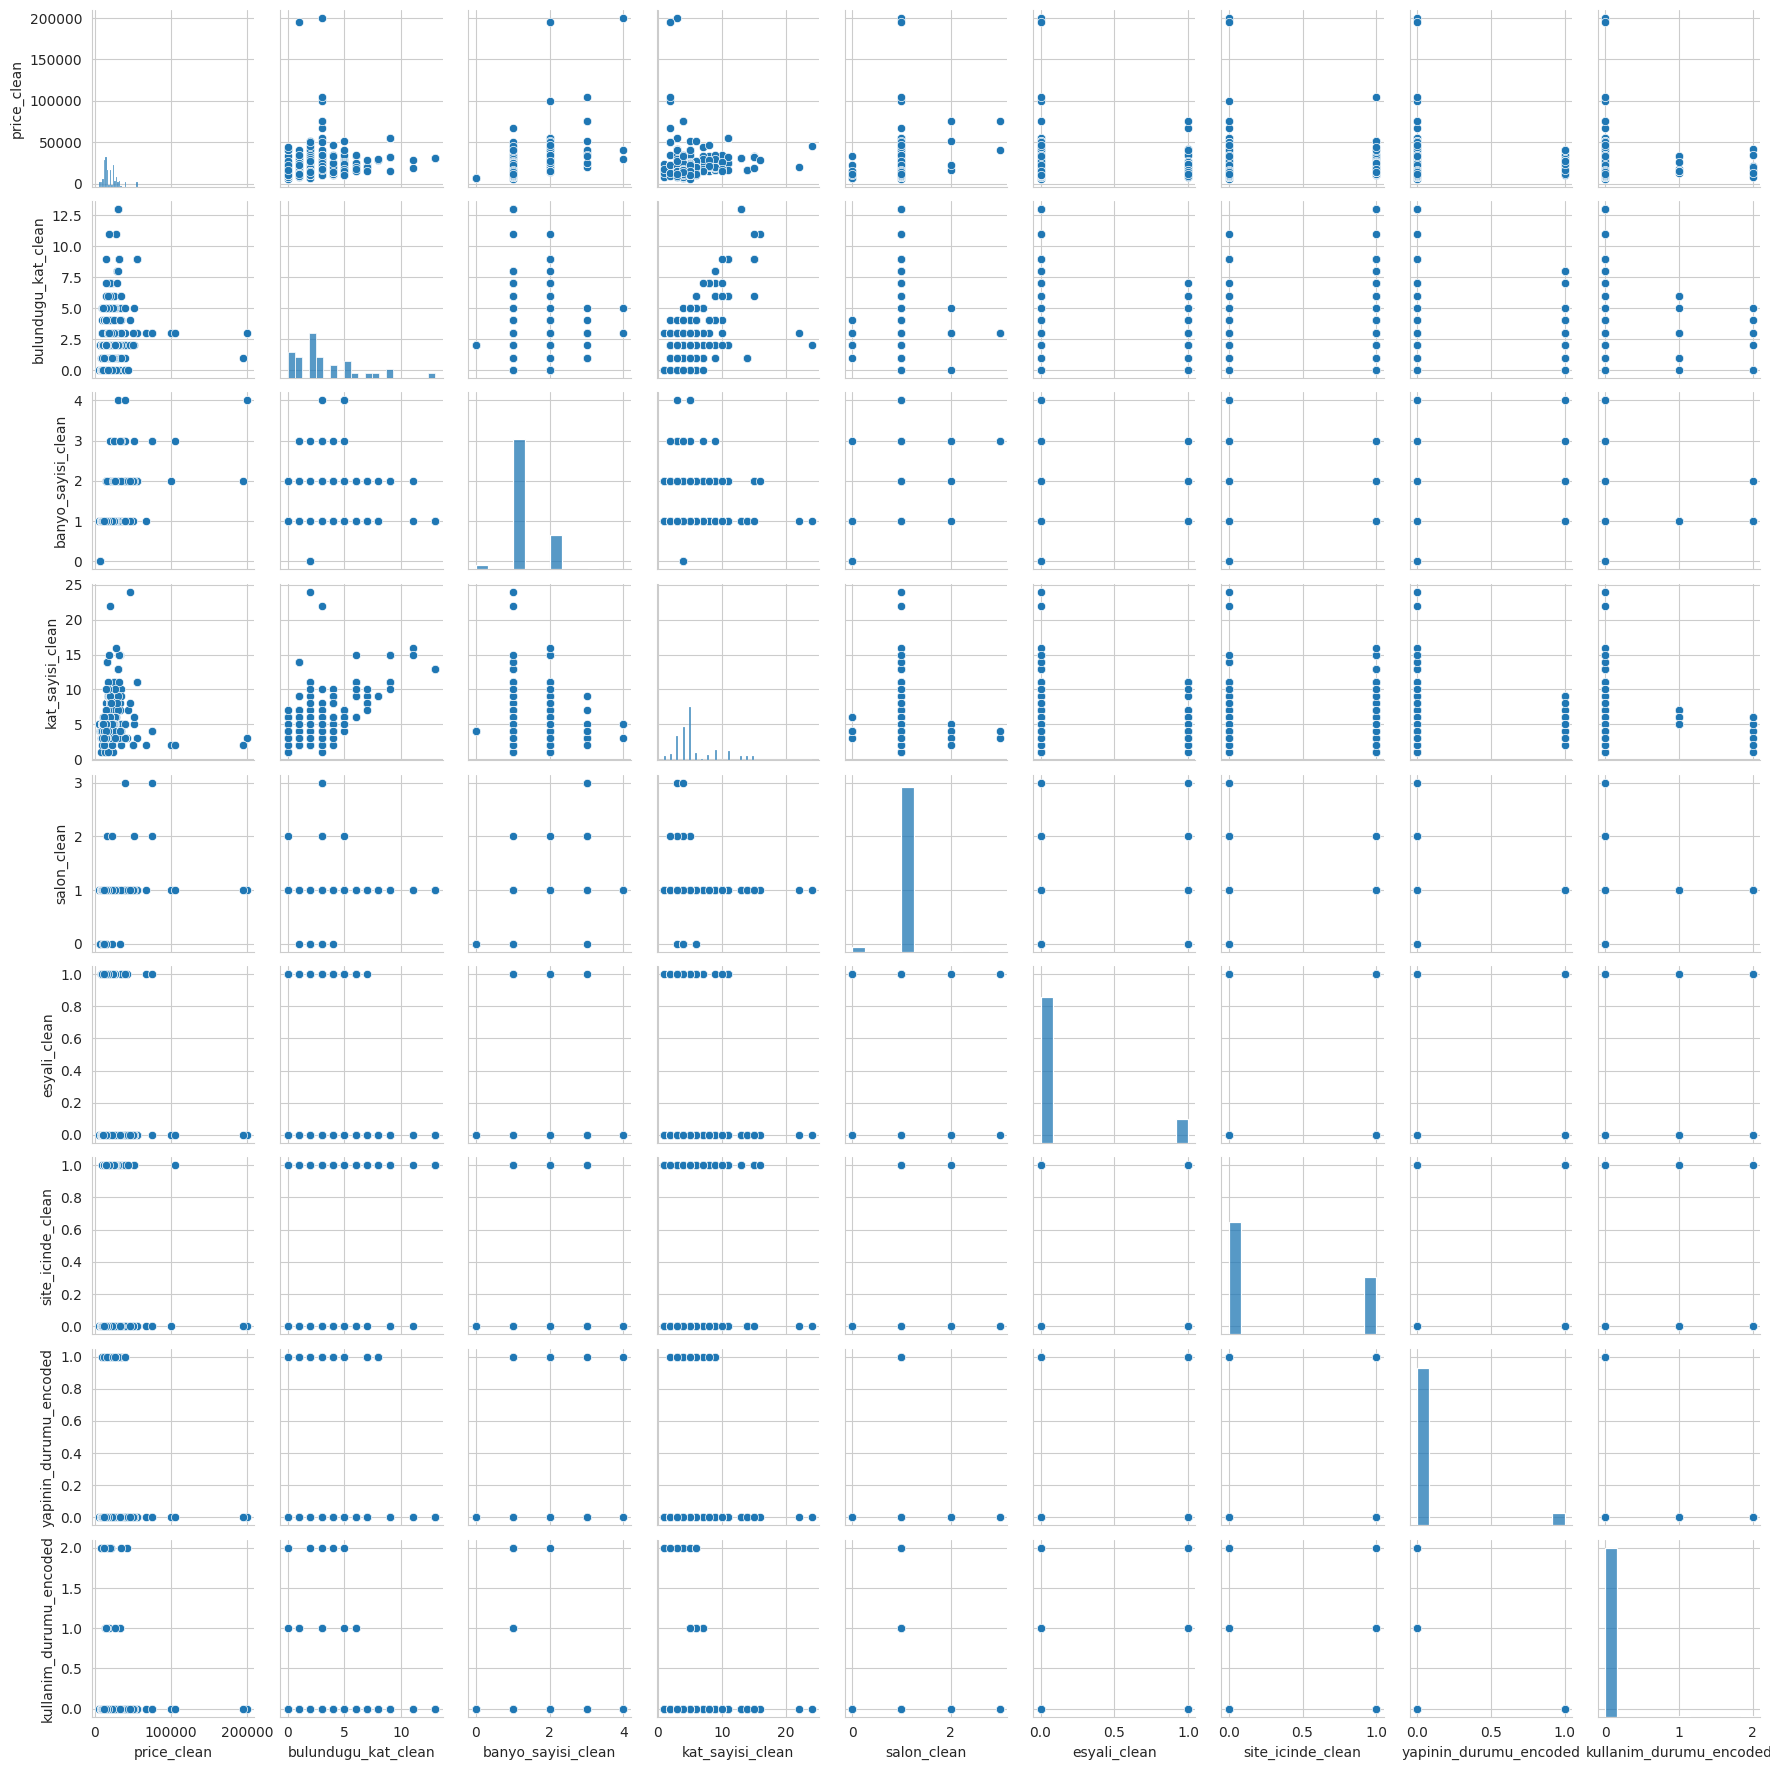

In [15]:
# Select only integer-type columns from the dataset
int_columns = dataset.select_dtypes(include='int64')

# Create pair plots to visualize pairwise relationships and distributions between integer features
sns.pairplot(int_columns, height=2)

# Display the plots
plt.show()

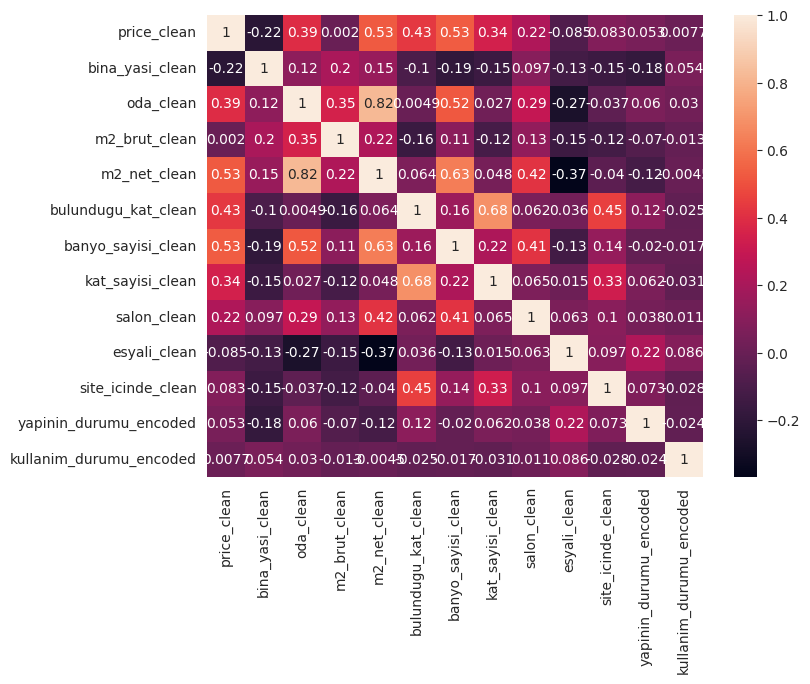

In [16]:
# Select only numeric columns from the dataset for correlation analysis
numeric_dataset = dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix of the numeric features
corr = numeric_dataset.corr()

# Create a figure with specific size for better visualization
plt.subplots(figsize=(8,6))

# Plot the heatmap of the correlation matrix
# vmax=1 sets the maximum correlation value color scale to 1
# square=False allows rectangular cells
# annot=True displays correlation coefficients on the heatmap
sns.heatmap(corr, vmax=1, square=False, annot=True)

# Show the plotted heatmap
plt.show()

# MODEL TRAINING

In [44]:
# Drop the target column 'price_clean' to create the feature matrix X
X = dataset_no_outliers.drop("price_clean", axis=1)
# Set the target variable y as the 'price_clean' column
y = dataset_no_outliers["price_clean"]

In [45]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Reshape the target variables to 2D arrays for scaling
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Initialize standard scalers for features and target
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the feature data (X)
X_train = sc_X.fit_transform(X_train)   # Fit and transform training features
X_test = sc_X.transform(X_test)         # Only transform test features

# Scale the target data (y)
y_train = sc_y.fit_transform(y_train)   # Fit and transform training target
y_test = sc_y.transform(y_test)         # Only transform test target

In [47]:
print(X_train,y_train)

[[-0.05693124 -0.35469846 -0.43151959 ... -0.03959038 -0.22388223
  -0.47466999]
 [-0.6500681   0.92945064 -0.03954955 ... -0.03959038 -0.22388223
  -0.47466999]
 [-0.6500681  -0.35469846 -0.17953885 ... -0.03959038 -0.22388223
  -0.47466999]
 ...
 [-0.05693124 -0.35469846 -0.43151959 ... -0.03959038 -0.22388223
  -0.47466999]
 [ 1.07991441 -0.35469846 -0.17953885 ... -0.03959038 -0.22388223
  -0.47466999]
 [ 1.07991441  0.92945064  5.36403748 ... -0.03959038 -0.22388223
  -0.47466999]] [[-0.80226756]
 [-0.43436834]
 [ 0.10134455]
 ...
 [-0.80226756]
 [-0.54409267]
 [-1.1895299 ]]


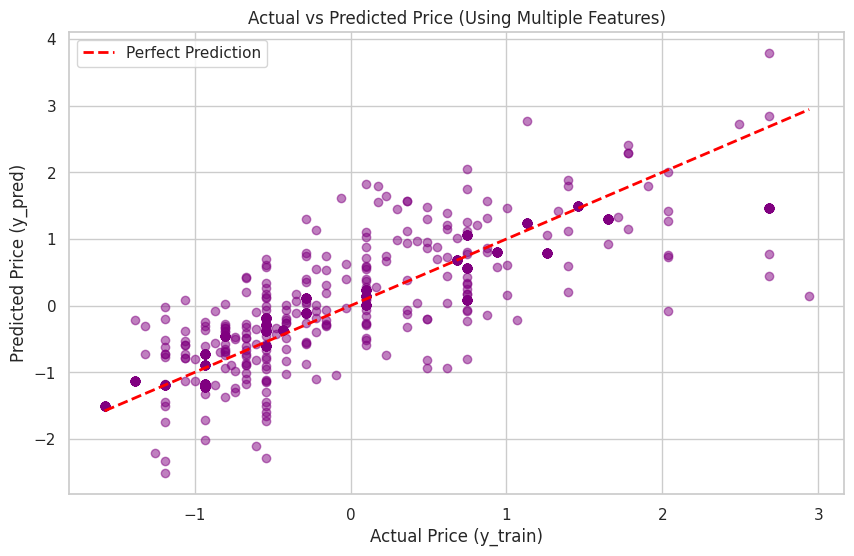

In [48]:
# Scale the data
sc_X = StandardScaler()
sc_y = StandardScaler()

# Fit and transform training features and target
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))  # Ensure y is 2D for scaling

# Train the linear regression model on all features
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

# Make predictions on the training data (scaled)
y_train_pred_scaled = regressor.predict(X_train_scaled)

# Inverse transform predictions back to original scale
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled)
y_train_original = y_train  # If y_train is already a NumPy array

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_original, y_train_pred, alpha=0.5, color='purple')  # Scatter plot of actual vs predicted
plt.plot([y_train_original.min(), y_train_original.max()],
         [y_train_original.min(), y_train_original.max()],
         color='red', linewidth=2, linestyle='--', label='Perfect Prediction')  # Diagonal reference line

plt.xlabel('Actual Price (y_train)')
plt.ylabel('Predicted Price (y_pred)')
plt.title('Actual vs Predicted Price (Using Multiple Features)')
plt.legend()
plt.grid(True)
plt.show()



In [49]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Train the model using the training data
lm.fit(X_train, y_train)

# Predict the target values for the test set
lm_prediction = lm.predict(X_test)

# Calculate evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)   # Mean Absolute Error
mse_lm = metrics.mean_squared_error(y_test, lm_prediction)    # Mean Squared Error
rmse_lm = np.sqrt(mse_lm)                                     # Root Mean Squared Error

In [50]:
# Print the evaluation results for Linear Regression
print('MAE:', mae_lm)   # Mean Absolute Error: average of absolute differences between predicted and actual values
print('MSE:', mse_lm)   # Mean Squared Error: average of squared differences between predicted and actual values
print('RMSE:', rmse_lm) # Root Mean Squared Error: square root of MSE, shows error in original units

MAE: 0.31378525575511074
MSE: 0.20223521327749247
RMSE: 0.4497056962920222


In [51]:
# Initialize the Decision Tree Regressor with a fixed random state for reproducibility
dt = DecisionTreeRegressor(random_state=100)

# Train the model using the training data
dt.fit(X_train, y_train)

# Predict the target values for the test set
dt_prediction = dt.predict(X_test)

# Calculate evaluation metrics for model performance
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)   # Mean Absolute Error
mse_dt = metrics.mean_squared_error(y_test, dt_prediction)    # Mean Squared Error
rmse_dt = np.sqrt(mse_dt)                                     # Root Mean Squared Error


In [52]:
# Print the evaluation metrics for the Decision Tree model
print('MAE:', mae_dt)   # Mean Absolute Error: measures the average magnitude of the errors
print('MSE:', mse_dt)   # Mean Squared Error: penalizes larger errors more than MAE
print('RMSE:', rmse_dt) # Root Mean Squared Error: interpretable in the same unit as the target variable

MAE: 0.11595256188914657
MSE: 0.14243629217225026
RMSE: 0.37740732925083775


In [53]:
# Initialize the Support Vector Regressor (SVR) with default parameters
svr = SVR()

# Train the SVR model using the training data
svr.fit(X_train, y_train)

# Predict the target values for the test set
svr_prediction = svr.predict(X_test)

# Calculate evaluation metrics to assess model performance
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)   # Mean Absolute Error
mse_svr = metrics.mean_squared_error(y_test, svr_prediction)    # Mean Squared Error
rmse_svr = np.sqrt(mse_svr)                                     # Root Mean Squared Error

In [54]:
# Print the evaluation metrics for the Support Vector Regression model
print('MAE:', mae_svr)   # Mean Absolute Error: average of the absolute errors between predicted and actual values
print('MSE:', mse_svr)   # Mean Squared Error: average of the squared errors between predicted and actual values
print('RMSE:', rmse_svr) # Root Mean Squared Error: square root of MSE, represents error in the same unit as the target

MAE: 0.17561146287230442
MSE: 0.10863131812401239
RMSE: 0.32959265483929157


In [55]:
# Initialize the Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100)

# Train the Random Forest model using the training data
rf.fit(X_train, y_train)

# Predict the target values for the test set
rf_prediction = rf.predict(X_test)

# Calculate evaluation metrics to assess model performance
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)   # Mean Absolute Error
mse_rf = metrics.mean_squared_error(y_test, rf_prediction)    # Mean Squared Error
rmse_rf = np.sqrt(mse_rf)                                     # Root Mean Squared Error

                        Feature  Importance Score
3                  m2_net_clean          0.390090
4           bulundugu_kat_clean          0.217798
6              kat_sayisi_clean          0.088139
18                 İlçe_Nilüfer          0.064811
0               bina_yasi_clean          0.064609
34    Isıtma Türü_Yerden Isıtma          0.037889
1                     oda_clean          0.037660
2                 m2_brut_clean          0.037063
9             site_icinde_clean          0.010288
5            banyo_sayisi_clean          0.009667
8                  esyali_clean          0.009113
16                 İlçe_Mudanya          0.005323
11      kullanim_durumu_encoded          0.005116
31         Isıtma Türü_Merkezi           0.003839
20               İlçe_Osmangazi          0.003405
29            Isıtma Türü_Kombi          0.003235
33             Isıtma Türü_Soba          0.002667
19               İlçe_Orhangazi          0.001755
10       yapinin_durumu_encoded          0.001690


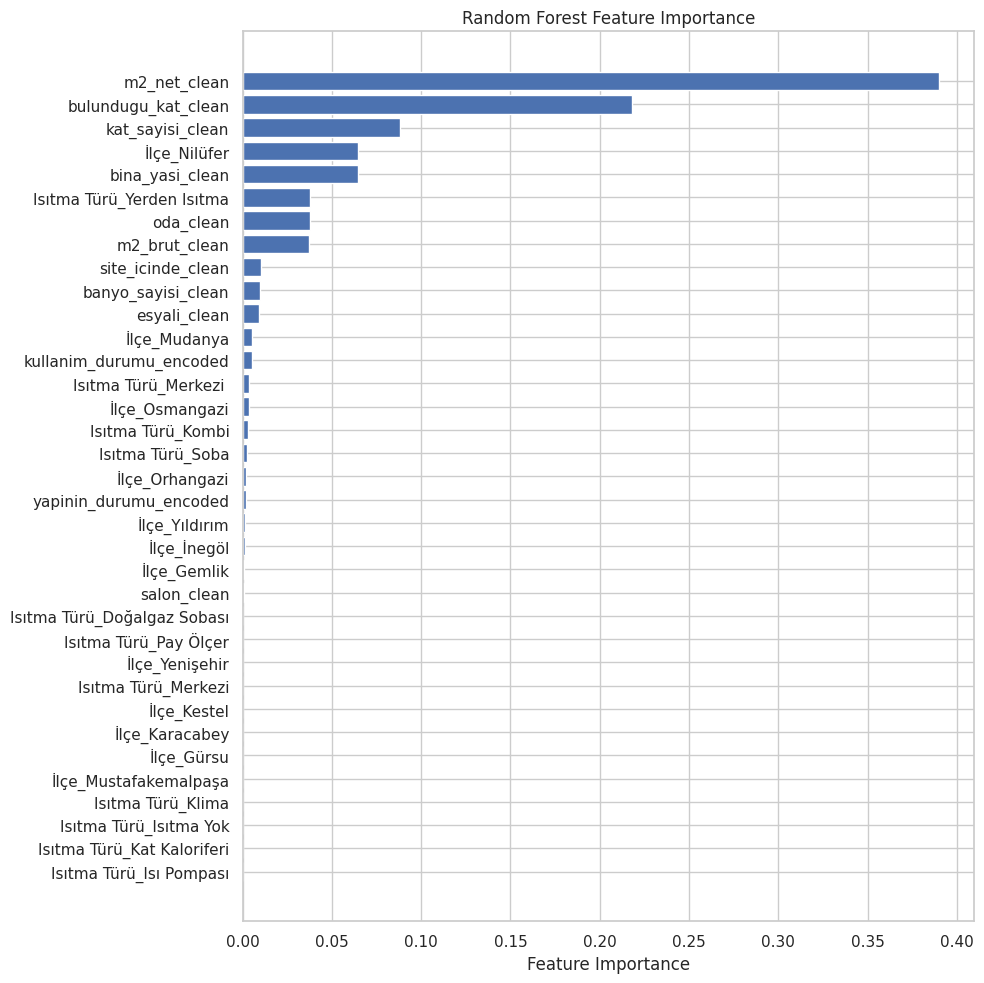

In [56]:
import matplotlib.pyplot as plt

# Get feature names from the dataset
feature_names = X.columns

# Get feature importance scores from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for better readability, sorting features by importance score in descending order
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': feature_importances
}).sort_values(by='Importance Score', ascending=False)

# Print the feature importance DataFrame
print(importance_df)

# Create a horizontal bar plot with a large figure size
plt.figure(figsize=(10, 10))

# Plot feature importance as horizontal bars
plt.barh(importance_df['Feature'], importance_df['Importance Score'])

# Label x-axis
plt.xlabel("Feature Importance")

# Add title to the plot
plt.title("Random Forest Feature Importance")

# Invert y-axis so the most important feature appears at the top
plt.gca().invert_yaxis()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

In [57]:
# Print the evaluation metrics for the Random Forest model
print('MAE:', mae_rf)   # Mean Absolute Error: average absolute difference between predicted and actual values
print('MSE:', mse_rf)   # Mean Squared Error: average squared difference, penalizes larger errors more
print('RMSE:', rmse_rf) # Root Mean Squared Error: square root of MSE, interpretable in original units

MAE: 0.09300362677102839
MSE: 0.09135314836755162
RMSE: 0.30224683351120757


In [58]:
# Import Lasso regression model and initialize it with alpha=0.1 for regularization strength
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

# Train the Lasso regression model on the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
clf_prediction = clf.predict(X_test)

# Calculate evaluation metrics to assess model performance
mae_clf = metrics.mean_absolute_error(y_test, clf_prediction)   # Mean Absolute Error
mse_clf = metrics.mean_squared_error(y_test, clf_prediction)    # Mean Squared Error
rmse_clf = np.sqrt(mse_clf)                                     # Root Mean Squared Error

In [59]:
# Print the evaluation metrics for the Lasso regression model
print('MAE:', mae_clf)   # Mean Absolute Error: average absolute difference between predicted and actual values
print('MSE:', mse_clf)   # Mean Squared Error: average squared difference between predicted and actual values
print('RMSE:', rmse_clf) # Root Mean Squared Error: square root of MSE, represents error in original units

MAE: 0.41940872403025337
MSE: 0.3015183644049362
RMSE: 0.5491068788541409


In [60]:
# Calculate the R-squared (coefficient of determination) scores for different models
r2_lm = r2_score(y_test, lm_prediction)    # Linear Regression R² score
r2_dt = r2_score(y_test, dt_prediction)    # Decision Tree R² score
r2_svr = r2_score(y_test, svr_prediction)  # Support Vector Regression R² score
r2_rf = r2_score(y_test, rf_prediction)    # Random Forest R² score

# Print the R² scores for each model to evaluate goodness of fit
print("Linear Regression R²:", r2_lm)
print("Decision Tree R²:", r2_dt)
print("SVR R²:", r2_svr)
print("Random Forest R²:", r2_rf)

Linear Regression R²: 0.7799576171792443
Decision Tree R²: 0.8450219394446898
SVR R²: 0.8818035014695063
Random Forest R²: 0.9006030447457626


# PRICE GUESSING

PRICE GUESSING FOR LINEAR REGRESSION

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize StandardScaler for features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 3. Scale feature data (fit on train, transform train and test)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert target variables to numpy arrays for scaling
y_train = np.array(y_train)
y_test = np.array(y_test)

# 4. Reshape and scale target variable (fit on train, transform train and test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Train the Linear Regression model on scaled training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

# 6. Make predictions on the scaled test set
lr_pred_scaled = lr.predict(X_test_scaled)

# 7. Inverse transform predictions and true values back to original scale
lr_pred = scaler_y.inverse_transform(lr_pred_scaled.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# 8. Calculate absolute percentage errors for each prediction
abs_percentage_errors = np.abs((y_test_real - lr_pred) / y_test_real) * 100

# 9. Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# 10. Print the evaluation metrics as percentages
print(f"Linear Regression Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Linear Regression Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

# 11. Predict the target value for the 11th row (index 10)
first_row = X.iloc[[0]]  # Select the 11th row as DataFrame
first_row_scaled = scaler_X.transform(first_row)  # Scale features

# 12. Predict on the scaled single row and inverse transform prediction
first_pred_scaled = lr.predict(first_row_scaled)
first_pred = scaler_y.inverse_transform(first_pred_scaled.reshape(-1, 1))

# 13. Calculate the percentage error for this prediction
actual_value = y.iloc[0]
percentage_error_first = abs((actual_value - first_pred[0][0]) / actual_value) * 100

# 14. Print the prediction, actual value, and percentage error
print(f"\nPredicted Value: {first_pred[0][0]:.2f} TL")
print(f"Actual Value: {actual_value:.2f} TL")
print(f"Percentage Error: {percentage_error_first:.2f}%")

Linear Regression Mean Absolute Error (MAE): 13.72%
Linear Regression Mean Squared Error (MSE): 373.48 (% squared)
Linear Regression Root Mean Squared Error (RMSE): 19.33%

Predicted Value: 13061.49 TL
Actual Value: 25000.00 TL
Percentage Error: 47.75%


PRICE GUESSING FOR RANDOM FOREST REGRESSOR

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize StandardScaler for features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 3. Scale feature data (fit on train, transform train and test)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert target variables to numpy arrays for scaling
y_train = np.array(y_train)
y_test = np.array(y_test)

# 4. Reshape and scale target variable (fit on train, transform train and test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Train the Random Forest Regressor on scaled training data
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train_scaled)

# 6. Make predictions on the scaled test set
rf_pred_scaled = rf.predict(X_test_scaled)

# 7. Inverse transform predictions and true values back to original scale
rf_pred = scaler_y.inverse_transform(rf_pred_scaled.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# 8. Calculate absolute percentage errors for each prediction
abs_percentage_errors = np.abs((y_test_real - rf_pred) / y_test_real) * 100

# 9. Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# 10. Print the evaluation metrics as percentages
print(f"Random Forest Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Random Forest Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

# 11. Predict the target value for the 11th row (index 10)
first_row = X.iloc[[10]]  # Select the 11th row as DataFrame
first_row_scaled = scaler_X.transform(first_row)  # Scale features

# 12. Predict on the scaled single row and inverse transform prediction
first_pred_scaled = rf.predict(first_row_scaled)
first_pred = scaler_y.inverse_transform(first_pred_scaled.reshape(-1, 1))

# 13. Calculate the percentage error for this prediction
actual_value = y.iloc[10]
percentage_error_first = abs((actual_value - first_pred[0][0]) / actual_value) * 100

# 14. Print the prediction, actual value, and percentage error
print(f"\nPredicted Value: {first_pred[0][0]:.2f} TL")
print(f"Actual Value: {actual_value:.2f} TL")
print(f"Percentage Error: {percentage_error_first:.2f}%")

Random Forest Mean Absolute Error (MAE): 4.41%
Random Forest Mean Squared Error (MSE): 339.82 (% squared)
Random Forest Root Mean Squared Error (RMSE): 18.43%

Predicted Value: 18900.00 TL
Actual Value: 18000.00 TL
Percentage Error: 5.00%


PRICE GUESSING FOR SUPPORT VECTOR REGRESSION

In [63]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize StandardScaler for features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 3. Scale feature data (fit on train, transform train and test)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert target variables to numpy arrays for scaling
y_train = np.array(y_train)
y_test = np.array(y_test)

# 4. Reshape and scale target variable (fit on train, transform train and test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Train the SVR model on scaled training data
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

# 6. Make predictions on the scaled test set
svr_pred_scaled = svr.predict(X_test_scaled)

# 7. Inverse transform predictions and true values back to original scale
svr_pred = scaler_y.inverse_transform(svr_pred_scaled.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# 8. Calculate absolute percentage errors for each prediction
abs_percentage_errors = np.abs((y_test_real - svr_pred) / y_test_real) * 100

# 9. Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# 10. Print the evaluation metrics as percentages
print(f"SVR Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"SVR Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"SVR Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

# 11. Predict the target value for the 11th row (index 10)
first_row = X.iloc[[10]]  # Select the 11th row as DataFrame
first_row_scaled = scaler_X.transform(first_row)  # Scale features

# 12. Predict on the scaled single row and inverse transform prediction
first_pred_scaled = svr.predict(first_row_scaled)
first_pred = scaler_y.inverse_transform(first_pred_scaled.reshape(-1, 1))

# 13. Calculate the percentage error for this prediction
actual_value = y.iloc[10]
percentage_error_first = abs((actual_value - first_pred[0][0]) / actual_value) * 100

# 14. Print the prediction, actual value, and percentage error
print(f"\nPredicted Value: {first_pred[0][0]:.2f} TL")
print(f"Actual Value: {actual_value:.2f} TL")
print(f"Percentage Error: {percentage_error_first:.2f}%")

SVR Mean Absolute Error (MAE): 8.35%
SVR Mean Squared Error (MSE): 344.03 (% squared)
SVR Root Mean Squared Error (RMSE): 18.55%

Predicted Value: 15230.45 TL
Actual Value: 18000.00 TL
Percentage Error: 15.39%


PRICE GUESSING FOR DECISION TREE

In [64]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize StandardScaler for features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 3. Scale feature data (fit on train, transform train and test)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert target variables to numpy arrays for scaling
y_train = np.array(y_train)
y_test = np.array(y_test)

# 4. Reshape and scale target variable (fit on train, transform train and test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Train the Decision Tree Regressor on scaled training data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)

# 6. Make predictions on the scaled test set
dt_pred_scaled = dt.predict(X_test_scaled)

# 7. Inverse transform predictions and true values back to original scale
dt_pred = scaler_y.inverse_transform(dt_pred_scaled.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# 8. Calculate absolute percentage errors for each prediction
abs_percentage_errors = np.abs((y_test_real - dt_pred) / y_test_real) * 100

# 9. Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# 10. Print the evaluation metrics as percentages
print(f"Decision Tree Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Decision Tree Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

# 11. Predict the target value for the 11th row (index 10)
first_row = X.iloc[[10]]  # Select the 11th row as DataFrame
first_row_scaled = scaler_X.transform(first_row)  # Scale features

# 12. Predict on the scaled single row and inverse transform prediction
first_pred_scaled = dt.predict(first_row_scaled)
first_pred = scaler_y.inverse_transform(first_pred_scaled.reshape(-1, 1))

# 13. Calculate the percentage error for this prediction
actual_value = y.iloc[10]
percentage_error_first = abs((actual_value - first_pred[0][0]) / actual_value) * 100

# 14. Print the prediction, actual value, and percentage error
print(f"\nPredicted Value: {first_pred[0][0]:.2f} TL")
print(f"Actual Value: {actual_value:.2f} TL")
print(f"Percentage Error: {percentage_error_first:.2f}%")

Decision Tree Mean Absolute Error (MAE): 5.32%
Decision Tree Mean Squared Error (MSE): 298.30 (% squared)
Decision Tree Root Mean Squared Error (RMSE): 17.27%

Predicted Value: 18000.00 TL
Actual Value: 18000.00 TL
Percentage Error: 0.00%


# PRICE GUESSING WITH NEW VALUES

PRICE GUESSING FOR RANDOM FOREST REGRESSOR WITH NEW VALUES

In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = dataset_no_outliers.drop(columns=["price_clean"])

y = dataset_no_outliers["price_clean"] # Target variable

# 2. Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize scalers and scale features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler on training features and transform both train and test sets
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit scaler on training target and transform training target
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# 4. Train the Random Forest Regressor on scaled training data
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train_scaled)

# 5. Prepare new input data for prediction (your own house features)
# Make sure the order of features matches the training data
feature_names = list(X.columns)
new_house_features = [[
    11,4,160,150,3,1,5,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,
]]
new_house_df = pd.DataFrame(new_house_features, columns=feature_names)

# 6. Scale the new input features using the fitted scaler
new_house_scaled = scaler_X.transform(new_house_df)

# 7. Predict the scaled price for the new input
pred_scaled = rf.predict(new_house_scaled)

# 8. Inverse transform the predicted price to original scale
predicted_price = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"Predicted rent price for the input house features: {predicted_price:.2f} TL")

# ----------------------
# Additional: Calculate error metrics on the test set
# ----------------------

# Predict on the scaled test set
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()
y_pred_scaled = rf.predict(X_test_scaled)

# Inverse transform predictions and actual target values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

# Calculate absolute percentage errors for each test prediction
abs_percentage_errors = np.abs((y_test_real - y_pred) / y_test_real) * 100

# Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error in %
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error in % squared
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error in %

# Print error metrics
print(f"\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

Predicted rent price for the input house features: 29975.00 TL

Test Set Performance:
Mean Absolute Error (MAE): 3.92%
Mean Squared Error (MSE): 140.01 (% squared)
Root Mean Squared Error (RMSE): 11.83%


PRICE GUESSING FOR SUPPORT VECTOR REGRESSION WITH NEW VALUES

In [72]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = dataset_no_outliers.drop(columns=["price_clean"]) # Features (all except target)

y = dataset_no_outliers["price_clean"] # Target variable

# 2. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize scalers and scale features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler on training features and transform train and test features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit scaler on training target and transform training target
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# 4. Train the SVR model on scaled training data
svr = SVR(kernel='rbf')  # You can change kernel if needed
svr.fit(X_train_scaled, y_train_scaled)

# 5. Prepare new input data (your own house features)
feature_names = list(X.columns)
new_house_features = [[
    11,4,160,150,3,1,5,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,
]]
new_house_df = pd.DataFrame(new_house_features, columns=feature_names)

# 6. Scale the new input features
new_house_scaled = scaler_X.transform(new_house_df)

# 7. Predict the scaled target value
pred_scaled = svr.predict(new_house_scaled)

# 8. Inverse transform the prediction back to original scale
predicted_price = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"Predicted rent price for the input house features: {predicted_price:.2f} TL")

# ----------------------
# Additional: Calculate error metrics on the test set
# ----------------------

# Scale the test target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# Predict on the scaled test features
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform predictions and actual values back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

# Calculate absolute percentage errors for test predictions
abs_percentage_errors = np.abs((y_test_real - y_pred) / y_test_real) * 100

# Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# Print error metrics
print(f"\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

Predicted rent price for the input house features: 29367.57 TL

Test Set Performance:
Mean Absolute Error (MAE): 8.16%
Mean Squared Error (MSE): 326.43 (% squared)
Root Mean Squared Error (RMSE): 18.07%


PRICE GUESSING FOR DECISION TREE WITH NEW VALUES

In [73]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = dataset_no_outliers.drop(columns=["price_clean"]) # Features (all except target)

y = dataset_no_outliers["price_clean"] # Target variable

# 2. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize scalers and scale features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler on training features and transform train and test features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit scaler on training target and transform training target
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# 4. Train the Decision Tree Regressor on scaled training data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)

# 5. Prepare new input data (your own house features)
feature_names = list(X.columns)
new_house_features = [[
    11,4,160,150,3,1,5,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,
]]
new_house_df = pd.DataFrame(new_house_features, columns=feature_names)

# 6. Scale the new input features
new_house_scaled = scaler_X.transform(new_house_df)

# 7. Predict the scaled target value
pred_scaled = dt.predict(new_house_scaled)

# 8. Inverse transform the prediction back to original scale
predicted_price = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"Predicted rent price for the input house features: {predicted_price:.2f} TL")

# ----------------------
# Additional: Calculate error metrics on the test set
# ----------------------

# Scale the test target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# Predict on the scaled test features
y_pred_scaled = dt.predict(X_test_scaled)

# Inverse transform predictions and actual values back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

# Calculate absolute percentage errors for test predictions
abs_percentage_errors = np.abs((y_test_real - y_pred) / y_test_real) * 100

# Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# Print error metrics
print(f"\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

Predicted rent price for the input house features: 25000.00 TL

Test Set Performance:
Mean Absolute Error (MAE): 4.89%
Mean Squared Error (MSE): 261.24 (% squared)
Root Mean Squared Error (RMSE): 16.16%


PRICE GUESSING FOR LINEAR REGRESSION WITH NEW VALUES

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = dataset_no_outliers.drop(columns=["price_clean"]) # Features (all except target)

y = dataset_no_outliers["price_clean"] # Target variable

# 2. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize scalers and scale features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler on training features and transform both train and test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit scaler on training target and transform training target
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# 4. Train the Linear Regression model on scaled training data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

# 5. Prepare new input data (your own house features)
feature_names = list(X.columns)
new_house_features = [[
    11,4,160,150,3,1,5,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,
]]
new_house_df = pd.DataFrame(new_house_features, columns=feature_names)

# 6. Scale the new input features
new_house_scaled = scaler_X.transform(new_house_df)

# 7. Predict the scaled target value
pred_scaled = lm.predict(new_house_scaled)

# 8. Inverse transform the prediction to original scale
predicted_price = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"Predicted rent price for the input house features: {predicted_price:.2f} TL")

# ----------------------
# Additional: Calculate error metrics on the test set
# ----------------------

# Scale the test target variable
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# Predict on the scaled test features
y_pred_scaled = lm.predict(X_test_scaled)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1))

# Calculate absolute percentage errors for test predictions
abs_percentage_errors = np.abs((y_test_real - y_pred) / y_test_real) * 100

# Calculate evaluation metrics as percentage errors
mae_percent = np.mean(abs_percentage_errors)  # Mean Absolute Error (%)
mse_percent = np.mean(abs_percentage_errors ** 2)  # Mean Squared Error (% squared)
rmse_percent = np.sqrt(mse_percent)  # Root Mean Squared Error (%)

# Print error metrics
print(f"\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_percent:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percent:.2f} (% squared)")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.2f}%")

Predicted rent price for the input house features: 30723.66 TL

Test Set Performance:
Mean Absolute Error (MAE): 13.77%
Mean Squared Error (MSE): 350.56 (% squared)
Root Mean Squared Error (RMSE): 18.72%


# **RESULTS**

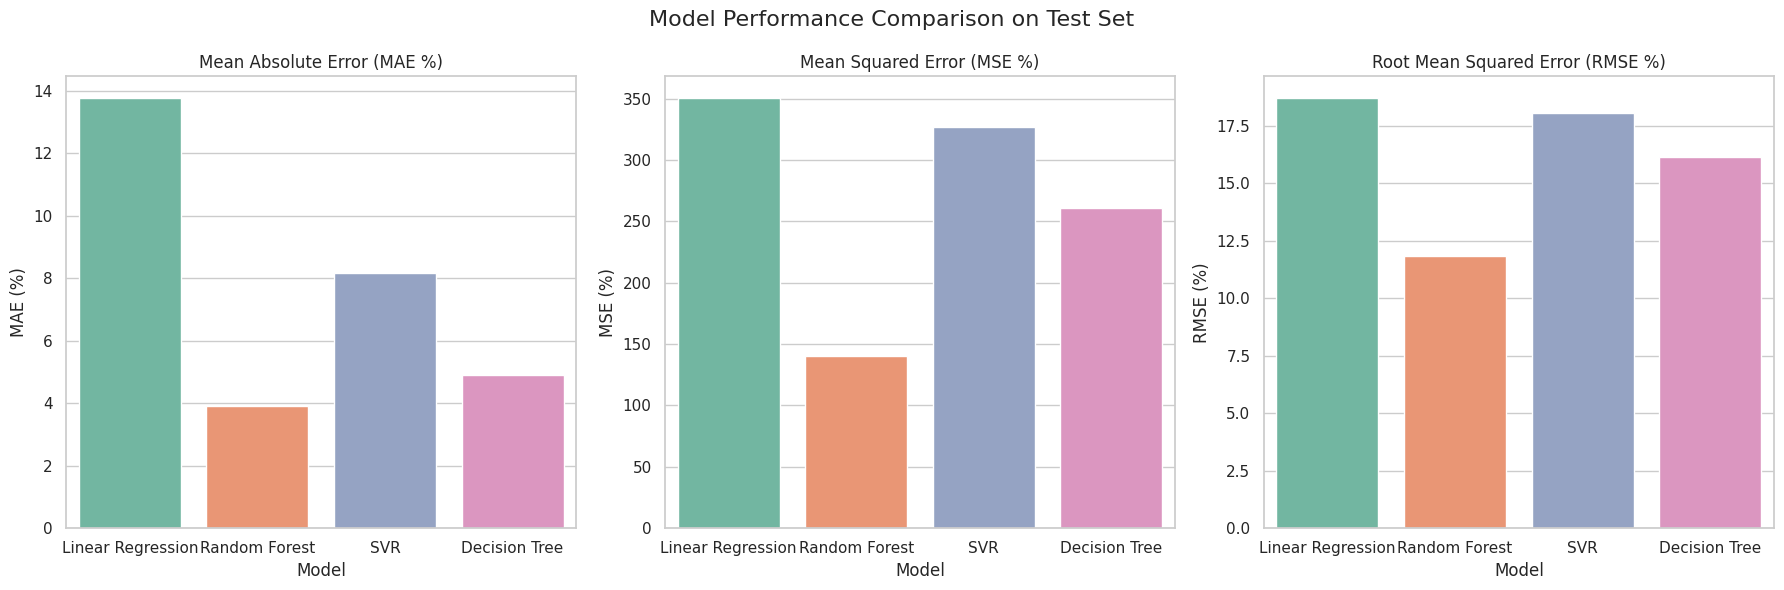

               Model  MAE (%)  MSE (%)  RMSE (%)
0  Linear Regression    13.77   350.56     18.72
1      Random Forest     3.92   140.01     11.83
2                SVR     8.16   326.43     18.07
3      Decision Tree     4.89   261.24     16.16


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# 1. DEFINE AND TRAIN MODELS
# -----------------------------

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)

    # Predict on test data (scaled)
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform predictions and actual values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

    # Percentage error hesapla
    abs_percentage_errors = np.abs((y_test_real - y_pred) / y_test_real) * 100

    mae_percent = np.mean(abs_percentage_errors)
    mse_percent = np.mean(abs_percentage_errors ** 2)
    rmse_percent = np.sqrt(mse_percent)

    results.append({
        'Model': name,
        'MAE (%)': mae_percent,
        'MSE (%)': mse_percent,
        'RMSE (%)': rmse_percent
    })

# -----------------------------
# 2. DATAFRAME AND GRAPHS
# -----------------------------
results_df = pd.DataFrame(results)

# Graph settings
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(ax=axes[0], x="Model", y="MAE (%)", data=results_df, palette=colors)
axes[0].set_title("Mean Absolute Error (MAE %)")

sns.barplot(ax=axes[1], x="Model", y="MSE (%)", data=results_df, palette=colors)
axes[1].set_title("Mean Squared Error (MSE %)")

sns.barplot(ax=axes[2], x="Model", y="RMSE (%)", data=results_df, palette=colors)
axes[2].set_title("Root Mean Squared Error (RMSE %)")

plt.suptitle("Model Performance Comparison on Test Set", fontsize=16)
plt.tight_layout()
plt.show()

print(results_df.round(2))


# **CONCLUSION**

**How it can be improved ?** <br>
*   If location information such as city, district, and neighborhood were replaced with precise geographic coordinates (latitude and longitude), spatial patterns could be learned more effectively.
*  A larger and more complete dataset would also reduce the risk of bias and increase the model’s robustness.
*   Better feature selection and dimensionality reduction techniques can improve generalization.
*   Including additional features such as crime rates, distance to public transportation, or school quality could further enhance accuracy.

**Interpretation :** <br>The model shows that variables such as overall quality, total square footage, and location have a significant influence on house prices. Accurate predictions are more likely when the input data is rich, complete, and contains spatial details in a usable form.

# **FUTURE**

**What can be done with your study? & Is there a business value proposition?**

<br>Our study demonstrates that machine learning models can effectively predict rental house prices using key property features, offering a reliable, data-driven alternative to subjective pricing. This helps both tenants and landlords make informed decisions by reducing uncertainty and supporting fair market valuations.

For future work, the model can be enhanced by expanding the dataset to include listings from different cities, incorporating temporal features to capture seasonal or yearly trends, and integrating geographic data such as proximity to public transportation, schools, or amenities. Additionally, the pricing system could be indexed to more stable economic indicators—such as gold prices or inflation rates—to provide users with a normalized and comparative view of rental value over time, especially in volatile markets.

The model can also be deployed within real estate websites or mobile applications to offer instant rental price estimates, and continuously trained with real-time data to maintain its accuracy.

From a business perspective, this system has significant value in the PropTech space. It can function as a pricing recommendation engine, support decision-making for real estate professionals, save time and operational costs, and increase platform engagement and customer trust. By offering more transparent and intelligent pricing, real estate platforms can gain a competitive edge and build long-term user loyalty.

# REFERENCES





*   https://www.kaggle.com/code/prashantverma13/house-rent-prediction-in-depth-analysis-models
*   https://chatgpt.com/
*   https://www.blackbox.ai/
*   https://www.udemy.com/course/makine-ogrenmesi-egitimi/





